## Python Control
依存ライブラリ
- slycot

MATLAB互換関数マニュアル
- http://python-control.sourceforge.net/manual/matlab_strings.html?highlight=margin#matlab.margin


In [1]:
! pip install control
! pip install slycot

In [18]:
import sympy as sp
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
%matplotlib inline

# パラメータ
K = 1.0
T = 0.5

# 伝達関数モデル作成(sageから使う場合[]の配列ではなく、np.arrayを使う)
num = np.array([K])
den = np.array([T, 1])
G1st = matlab.tf(num, den)
print(G1st)


    1
---------
0.5 s + 1



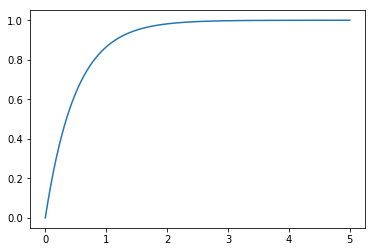

In [3]:
# ステップ応答波形
t = np.linspace(0, 5.0, 1000)
(output, t) = matlab.step(G1st, t)

# 出力パラメータ
plt.plot(t, output)
plt.show()
# 時定数は、Yが(1 - 1/e)の値になるまでの時間
# 以下の例では0.5の時に0.63になっている

In [6]:
# numpy, sageのmatrixでも動いた！
A = np.matrix([[1, 1, 2], [2, 1, 1], [3, 4, 5]])
B =  np.matrix([[2], [0], [1]])
C =  np.matrix([[1, 1, 0]])
D =  np.matrix([[0]])
#show(A); show(B); show(C); show(D)
P = matlab.ss(A, B, C, D)
P

A = [[1. 1. 2.]
 [2. 1. 1.]
 [3. 4. 5.]]

B = [[2.]
 [0.]
 [1.]]

C = [[1. 1. 0.]]

D = [[0.]]

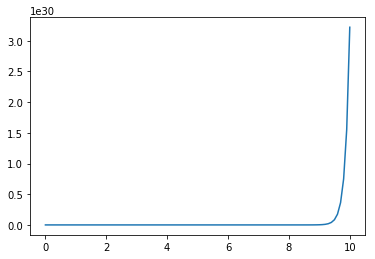

In [7]:
# ステップ応答をプロット
(Y, T) = matlab.step(P, T=np.linspace(0,10,100))

plt.plot(T, Y)
plt.show()

In [13]:
A = np.matrix([[0, 1], [-4, -5]])
B = np.matrix([[0], [1]])
C = np.eye(2)
D = np.matrix([[0], [0]])
P = matlab.ss(A, B, C, D)

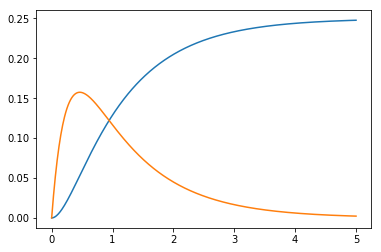

In [14]:
# 初期値を(0, 0)とし、入力u(t)をステップ関数とした時の応答
T=np.linspace(0,5,500)
(Y, T) = matlab.step(P, T)
plt.plot(T, Y)
plt.show()

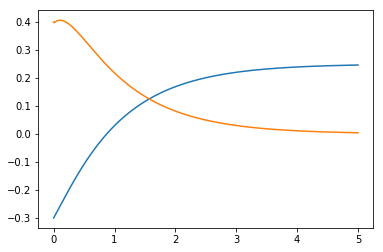

In [15]:
# 初期値X0を与えた状態応答（零入力応答+零状態応答）
Ud = 1*(T > 0)
X0 = [-0.3, 0.4]
(Y, T, _) = matlab.lsim(P, Ud, T, X0)
plt.plot(T, Y)
plt.show()

In [16]:
print(P)
print(matlab.pole(P))

A = [[ 0.  1.]
 [-4. -5.]]

B = [[0.]
 [1.]]

C = [[1. 0.]
 [0. 1.]]

D = [[0.]
 [0.]]

[-1. -4.]


In [21]:
# sympyでの部分分数分解apart, sageだとpartial_fraction
sp.var('s T')
P = 1/((1+T*s)*s)
sp.apart(P, s)

-T/(T*s + 1) + 1/s

## 本の例題
図5.6のP制御の例
$$
J \ddot{y(t)} + \mu \dot{y(t)} + M g l y(t) = u(t)
$$
をラプラス変換すると
$$
J s^2 y(s) + \mu s + M g l y(s) = u(s)
$$
これから伝達率$P(s) = \frac{y(s)}{u(s)}$を求めると
$$
P(s) =  \frac{y(s)}{u(s)} = \frac{1}{J s^2 + \mu s + M g l}
$$

In [22]:
g = 9.8
l  = 0.2
M = 0.5
mu = 1.5E-2
J = 1.0E-2

# sageの配列からnp.arrayへの変換が必要
P = matlab.tf(np.array([1]), np.array([J, mu, M*g*l]))
P


            1
-------------------------
0.01 s^2 + 0.015 s + 0.98

### フィードバック
入力X(s)に対してG(s)の変換を加えてその出力Y(s)にH(s)のフィードバックを入力から引く、このときG(s)への入力をE(s)とする以下の式が成り立ちます。
$$
E(s) = X(s) - H(s)Y(s), Y(s) = G(s)E(s)
$$
組み合わせると、
$$
Y(s) = G(s)(X(s) - H(s)Y(s))
$$
Y(s)とX(s)の関係に整理すると
$$
(1+G(s)H(s))Y(s) = G(s) X(s)
$$
したがってフィードバックの伝達関数$\frac{Y(s)}{X(s)}$は、以下の様に求まります。
$$
F(s) = \frac{Y(s)}{X(s)} = \frac{G(s)}{1 + G(s) H(s)}
$$

In [23]:
Kp = 2
K = matlab.tf(np.array([Kp]), np.array([1]))
G = matlab.feedback(P*K)
print(P*K)
print(G)


            2
-------------------------
0.01 s^2 + 0.015 s + 0.98


            2
-------------------------
0.01 s^2 + 0.015 s + 2.98



### P制御

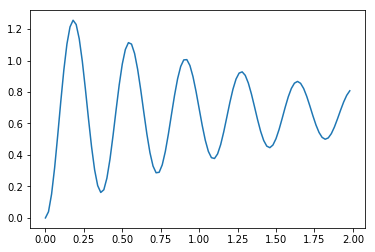

In [24]:
# 可視化
y, t = matlab.step(G, np.arange(0, 2, 0.02))
plt.plot(t, y)
plt.show()

### PD制御
制御K(s)が以下の様な形式となります。
$$
K_P +  K_D \, s
$$
これを伝達関数tfで表すと以下の様になります。
$$
K(s) = \frac{K_D \, s  + K_P}{1}
$$

In [25]:
Kd = 0.1
K = matlab.tf(np.array([Kd, Kp]), np.array([1]))
G = matlab.feedback(P*K)
G


        0.1 s + 2
-------------------------
0.01 s^2 + 0.115 s + 2.98

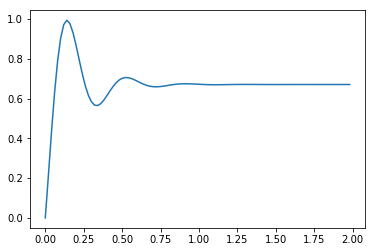

In [26]:
# 可視化
y, t = matlab.step(G, np.arange(0, 2, 0.02))
plt.plot(t, y)
plt.show()

### PID制御
制御K(s)が以下の様な形式となります。
$$
K_P + K_D s + K_I \frac{1}{s}
$$
これを伝達関数tfで表すと以下の様になります。
$$
K(s) = \frac{K_D s^2 + K_P s + K_I}{s}
$$

In [27]:
Ki = 10
K = matlab.tf(np.array([Kd, Kp, Ki]), np.array([1, 0]))
G = matlab.feedback(P*K)
G


        0.1 s^2 + 2 s + 10
----------------------------------
0.01 s^3 + 0.115 s^2 + 2.98 s + 10

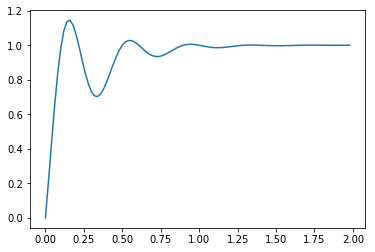

In [28]:
# 可視化
y, t = matlab.step(G, np.arange(0, 2, 0.02))
plt.plot(t, y)
plt.show()

## 最適レギュレータ


In [29]:
A = np.matrix([[0, 1], [-4, 5]])
B = np.matrix([[0], [1]])
C = np.matrix([[1, 0], [0, 1]])
D = np.matrix([[0], [1]])
P = matlab.ss(A, B, C, D)
P

A = [[ 0.  1.]
 [-4.  5.]]

B = [[0.]
 [1.]]

C = [[1. 0.]
 [0. 1.]]

D = [[0.]
 [1.]]

In [30]:
Q = np.matrix([[100, 0], [0, 1]])
R = 1
F, X, E = matlab.lqr(P.A, P.B, Q, R)
F = -F
F

matrix([[ -6.77032961, -11.28813639]])

In [31]:
# リッカチの方程式の解 -(1/R)*B^T Xと一致する
print(-(1/R)*P.B.T * X)

[[ -6.77032961 -11.28813639]]


In [32]:
X

matrix([[87.72530155,  6.77032961],
        [ 6.77032961, 11.28813639]])

In [33]:
E

array([-3.1440682+0.94083196j, -3.1440682-0.94083196j], dtype=complex64)

In [34]:
np.linalg.eigvals(P.A+P.B*F)

array([-3.14406819+0.94083198j, -3.14406819-0.94083198j])

In [35]:
np.hstack((A, B))

matrix([[ 0,  1,  0],
        [-4,  5,  1]])

### 常微分方程式の解
1階連立方程式を解く。$x(t)$はベクトルで振子では$[\theta(t), \dot{\theta(t)}]$となります。
$$
\dot{x(t)} = X x(t)
$$

非線形方程式の線形化（$sin \theta = \theta$)では$\theta$が大きくなるにつれて誤差が大きくなっているのが分かります。

In [36]:
from scipy.integrate import odeint

In [43]:
g = 9.8 #重力加速度
l = 1.0 #振り子の長さ
q0 = 90/180.0*np.pi #初期角度
dq0 = 0.0 #初期角速度
x0 = [q0, dq0] #初期値ベクトル
t = np.arange(0,10,0.01) # 時間

# 振り子の運動方程式の右辺
def rhs1(x,t) :
  return [x[1], -g/l*np.sin(x[0])]

# 微小振幅として線形化した場合
def rhs2(x,t) :
  return [x[1], -g/l*x[0]]

# 数値積分の実行
x1 = odeint(rhs1, x0, t)
x2 = odeint(rhs2, x0, t)

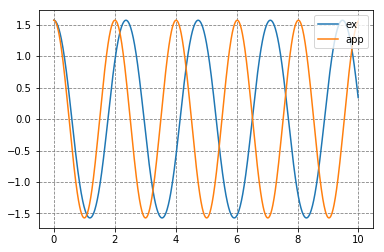

In [44]:
plt.plot(t, x1[:,0], label='ex')
plt.plot(t, x2[:,0], label='app')
plt.grid(True, color='gray', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

In [45]:
import sympy as sp
from sympy.abc import t

In [46]:
sp.init_printing()

In [47]:
m, L, g, t = sp.var("m L g t")
thF, dThF = sp.var("thF, dTHF")
th = sp.Function("th")

In [49]:
#運動エネルギーの定義
x = l*sp.sin(th(t))
y = l*sp.cos(th(t))
J = (1/3)*m*l**2
T = (1/2)*m*(sp.diff(x, t)**2 + sp.diff(y,t)**2)+(1/2)*J*sp.diff(th(t), t)**2
# ポテンシャルエネルギーの定義
V = m*g*l*sp.cos(th(t))
# ラグランジュ関数を定義
L = T - V

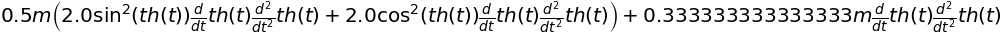

In [50]:
sp.diff(T, t)

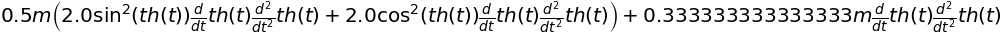

In [52]:
display(sp.diff(T, t))

In [53]:
# 変数定義
m, M, l, g = sp.var("m M l g")
thF, dthF, ddthF, rF, drF, ddrF, FF = sp.var("thF dthF ddthF rF drF ddrF FF")
# 関数定義
t = sp.Symbol("t")
th = sp.Function("th")(t)
r = sp.Function("r")(t)
F = sp.Function("F")(t)
# 台車の運動エネルギー
Tcart = 1/2*M*sp.diff(r,t)**2

In [54]:
def diff_f(eq, f, v):
    n_eq = eq.subs({f : v})
    d_eq = sp.diff(n_eq, v).subs({v : f})
    return d_eq

In [55]:
# 振子の運動エネルギー
x = r + l*sp.sin(th)
y = l*sp.cos(th)
J = (1/3)*m*l**2
Tpen = (1/2)*m*(sp.diff(x, t)**2 + sp.diff(y,t)**2)+(1/2)*J*sp.diff(th, t)**2
# ポテンシャルエネルギーの定義
Upen = m*g*l*sp.cos(th)
# ラグランジュ関数
L = Tcart + Tpen - Upen
# ラグランジュ方程式
LEr = (sp.diff(diff_f(L, sp.diff(r, t), drF), t) - diff_f(L, r, rF) - F).simplify()
LEth = (sp.diff(diff_f(L, sp.diff(th, t), dthF), t) - diff_f(L, th, thF)).simplify()
# ラグランジュ方程式を表示
print(LEr)
print(LEth)

1.0*M*Derivative(r(t), (t, 2)) + m*(-l*sin(th(t))*Derivative(th(t), t)**2 + l*cos(th(t))*Derivative(th(t), (t, 2)) + Derivative(r(t), (t, 2))) - F(t)
l*m*(-1.0*g*sin(th(t)) + 1.33333333333333*l*Derivative(th(t), (t, 2)) + 1.0*cos(th(t))*Derivative(r(t), (t, 2)))


In [56]:
A = np.matrix([[0, 1], [0, 0]])
B = np.matrix([[0], [1]])
C =np.matrix( [1, 0])
Q = np.matrix([1])
R = np.matrix([1])
X, E, F = matlab.care(A, B, C.T*Q*C, R)

In [57]:
E

array([-0.70710677+0.70710677j, -0.70710677-0.70710677j], dtype=complex64)

In [58]:
np.linalg.eig(A-B*F)

(array([-0.70710678+0.70710678j, -0.70710678-0.70710678j]),
 matrix([[ 0.70710678+0.j ,  0.70710678-0.j ],
         [-0.5       +0.5j, -0.5       -0.5j]]))

### 線形化
例えば以下の様なラグランジュ方程式（非線形方程式）を線形化する手順を示します。

$$
\left \{  \begin{array}{l}
\dot{\theta}(t) = \omega(t) \\
\dot{\omega}(t) = \frac{3g}{4l} sin\theta(t) + \frac{1}{J} \tau(t)
\end{array} \right.
$$

これから非線形の状態方程式$\dot{\xi} = f(\xi, \tau)$は以下の様になります。

$$
\underbrace{
 \begin{bmatrix}
  \dot{\theta}(t) \\
  \dot{\omega}(t)
 \end{bmatrix}}_{\dot{\xi}} 
 = \underbrace{\begin{bmatrix}
   \omega(t) \\
   \frac{3g}{4l} sin\theta(t) + \frac{1}{J} \tau(t)
 \end{bmatrix}}_{f(\xi, \tau)}
$$

ここで、ベクトル値関数$f(\xi, \tau)$を以下の様に表し、
$$
f(\xi, \tau)
 = \begin{bmatrix}
   f_1(\xi, \tau) \\
   f_2(\xi, \tau)
 \end{bmatrix}
$$

平衡状態$(\xi^*, \tau^*)$の回りで１次近似すると、以下を得ます。

$$
\underbrace{
 \begin{bmatrix}
  \dot{\xi}_1 \\
  \dot{\xi}_2
 \end{bmatrix}
}_{\dot{\xi}}  = 
 \underbrace{
  \begin{bmatrix}
   f_1(\xi^*, \tau^*) \\
   f_2(\xi^*, \tau^*)
  \end{bmatrix}
}_{\dot{\xi^*} = f(\xi^*, \tau^*)} +
\underbrace{
  \begin{bmatrix}
   \frac{f_1(\xi^*, \tau^*)}{\partial \xi_1} & \frac{f_1(\xi^*, \tau^*)}{\partial \xi_2} \\
   \frac{f_2(\xi^*, \tau^*)}{\partial \xi_1} & \frac{f_2(\xi^*, \tau^*)}{\partial \xi_2}
  \end{bmatrix}
 }_{A = \frac{\partial f(\xi^*, \tau^*)}{\partial \xi}}
 \underbrace{
  \begin{bmatrix}
   \xi_1 - \xi_1^* \\
   \xi_2 - \xi_2^*
  \end{bmatrix}
 }_{x = \xi - \xi^*} + 
 \underbrace{
  \begin{bmatrix}
   \frac{f_1(\xi^*, \tau^*)}{\partial \tau} \\
   \frac{f_2(\xi^*, \tau^*)}{\partial \tau}
  \end{bmatrix}
 }_{B = \frac{\partial f(\xi^*, \tau^*)}{\partial \tau}}
 \underbrace{
  (\tau - \tau^*)
 }_u
$$

左辺を$\dot{x} = \dot{\xi} - \dot{\xi}^*$で整理すると、線形化した状態方程式$\dot{x} = A x + B u$を得ます。

$$
\underbrace{
 \frac{d}{dt}\begin{bmatrix}
  \xi_1 - \xi_1^* \\
  \xi_2 - \xi_2^*
 \end{bmatrix}
}_{\dot{x} = \dot{\xi} - \dot{\xi}^*} = 
\underbrace{
  \begin{bmatrix}
   \frac{f_1(\xi^*, \tau^*)}{\partial \xi_1} & \frac{f_1(\xi^*, \tau^*)}{\partial \xi_2} \\
   \frac{f_2(\xi^*, \tau^*)}{\partial \xi_1} & \frac{f_2(\xi^*, \tau^*)}{\partial \xi_2}
  \end{bmatrix}
 }_{A = \frac{\partial f(\xi^*, \tau^*)}{\partial \xi}}
 \underbrace{
  \begin{bmatrix}
   \xi_1 - \xi_1^* \\
   \xi_2 - \xi_2^*
  \end{bmatrix}
 }_{x = \xi - \xi^*} + 
 \underbrace{
  \begin{bmatrix}
   \frac{f_1(\xi^*, \tau^*)}{\partial \tau} \\
   \frac{f_2(\xi^*, \tau^*)}{\partial \tau}
  \end{bmatrix}
 }_{B = \frac{\partial f(\xi^*, \tau^*)}{\partial \tau}}
 \underbrace{
  (\tau - \tau^*)
 }_u
$$
